[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aprendizaje-automatico-dc-uba-ar/material/blob/main/tp/01_aprendizaje_supervisado/tp01-enunciado.ipynb)

# Trabajo Práctico -  Aprendizaje supervisado

##Integrantes: Augusto Guarnaccio, Manuel Beren, Lucas Cavadini, Carolina Pueyo y Victoria Aguirre

### Clasificación de expresiones genómicas


<span style="color: red;">**Fecha de entrega: Jueves 01 de mayo del 2025 - hasta las 17:00hs.**

<span style="color: red;">**Fecha de entrega intermedia: Jueves 17 de Abril del 2025 - hasta las 17:00hs.**
</span>

## Introducción

En el mundo actual, distintas disciplinas científicas empiezan, cada vez más, a interactuar con el fin de potenciar sus descubrimientos. En este caso dos grupos de investigación de [CONICET](https://www.conicet.gov.ar/) se embarcan en la combinación entre biología y informática para abordar la detección temprana y el pronóstico preciso de enfermedades como el cáncer. Este proyecto combina las tecnologías de secuenciación de nueva generación ([_NGS_](https://es.wikipedia.org/wiki/Secuenciaci%C3%B3n_paralela_masiva), por sus siglas en inglés) con la potencia de la inteligencia artificial. El enfoque se centra en un dataset único que abarca mediciones de [_ARN_](https://es.wikipedia.org/wiki/ARN_mensajero) de 200 [_genes_](https://es.wikipedia.org/wiki/Gen), recopiladas de pacientes con lesiones [_pre-tumorales_](https://en.wikipedia.org/wiki/Hyperplasia). Este conjunto de datos se convierte en una valiosa fuente de información para entender cómo las células en estado de hiperplasia pueden evolucionar hacia [_tumores malignos_](https://en.wikipedia.org/wiki/Neoplasm), una transformación que ha desconcertado a la ciencia durante décadas.

La hiperplasia, es un fenómeno en el que las células experimentan un crecimiento anormal y descontrolado, es un punto de partida crucial en nuestro análisis. ¿Cómo y por qué algunas células que experimentan hiperplasia se convierten en células cancerosas, mientras que otras no? Esta pregunta es el corazón de nuestra investigación. Para responderla se realizo un estudio donde se obtuvieron muestras de distintos tipos de hiperplasias de pacientes con antecedentes familiares y lesiones pre tumorales. Este grupo de pacientes, o cohorte, fue monitoreado periodicamente durante los siguientes 5 años buscando indicios de neoplasias o nuevas hiperplasias más agresivas. Con las muestras obtenidas en este estudio se realizo un [_biobanco_](https://en.wikipedia.org/wiki/Biobank) con las mediciones que habitualmente se hacen en la construccion de este tipo de [_plataformas_](https://xena.ucsc.edu/). Cada muestra fue etiquetada como **_buen pronostico_**, si no hubo indicios de nuevas hiperplasias o similares; contrariamente se etiquetaron como de **_mal pronostico_** si hubo una recaida.

Este trabajo se concentra en un panel de genes, especificamente en la expresion de 200 genes que se creen tienen un papel crucial en la transformacion tumoral y su etiqueta correspondiente.

En concreto:

Tendrán un archivo `.csv` en donde se almacenan:
  - una matriz de datos `X` de $500$ filas en donde cada fila $x^{(i)}$ representa un vector de $200$ características de cada instancia. Es decir, $\textbf{x}^{(i)} = x_1^{(i)}, \dots, x_{200}^{(i)}$ con $i$ entre $1$ y $500$.
  - una columna llamada `target` que representa un vector de $500$ posiciones con dos posibles valores: `True` (ó 1, es decir, tiene buen pronostico) y `False` (ó 0, tiene mal pronostico).

Los datos están en esta [carpeta](https://github.com/aprendizaje-automatico-dc-uba-ar/material/tree/main/tp/01_aprendizaje_supervisado/datos).

Por otra parte, tendrán disponibles un conjunto de instancias sin etiquetas, que utilizaremos para comprobar la calidad de sus resultados (ver Ejercicio 5).

**Recomendamos fuertemente leer primero todo el enunciado del trabajo antes de empezar a trabajar sobre el problema propuesto.**

---

### Sobre el informe

Para este trabajo deberán entregar, además del código de las pruebas y experimentos que realicen, un informe en el que deberan seleccionar, para cada apartado, sus resultados acompañado de un texto que explique, reflexione, justifique y conluya dicho contenido.

Cada ejercicio indica el largo máximo del texto que se puede incluir. Los gráficos no están contados en dicho espacio.
Cada gráfico incluido debe contar con:
  
  - nombres de los ejes,
  - título,
  - leyenda autocontenida,
  - debe ser referenciado desde el texto, ya que su inclusión se da porque aporta a la discusión del trabajo.

**El informe no puede superar un máximo de 8 carillas (contando gráficos) o 4 hojas más carátula.** Tamaño de la letra: estandár de latex (10pt). No se corregirán trabajos que no cumplan con esta consigna.

---

## Ejercicio 1

### Separación de datos

Contarán con una cantidad limitada de datos, por lo cual es importante tomar una buena decisión en el momento de empezar a utilizarlos.

Evaluar y justificar cómo separarán sus datos para desarrollo y para evaluación. ¿Qué consideraciones tuvieron en cuenta para realizar esta división?

**Importante**: en este punto no está permitido dividir la base de datos utilizando la función `train_test_split` de sklearn. Deben decidir e implementar la separación.

In [ ]:
import pandas as pd
import numpy as np
import random
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from io import StringIO
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.model_selection import LearningCurveDisplay
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

In [ ]:
url = 'https://raw.githubusercontent.com/aprendizaje-automatico-dc-uba-ar/material/main/tp/01_aprendizaje_supervisado/datos/data.csv'
biobanco = pd.read_csv(url)

In [ ]:
biobanco.head()

,QqgU,IJsJ,YlJA,tFLR,MYkJ,Cado,cmdU,AUYy,mVEY,zSZq,...,cgNV,naPw,EOre,sMSU,TihR,sbWq,aWBQ,fGxK,JWOq,target
0,-0.753155,-0.304399,0.307146,-1.377240,-1.975242,-0.052628,0.430082,-0.659100,4.897377,0.754531,...,0.975926,-0.593156,0.315798,0.546475,1.128513,7.654107,0.563439,0.322854,-1.754513,0
1,0.660977,-1.374880,-0.039899,-0.157981,-0.263226,-0.035127,1.583745,-0.143602,12.945694,-0.347768,...,-0.274560,0.205678,-0.296301,-1.004013,7.090070,0.182824,0.113722,1.323722,0.710734,0
2,1.906825,-0.308091,1.115546,0.093203,-1.384119,0.616543,0.384448,-0.817921,-7.673495,1.028706,...,-0.369924,-0.678204,1.564510,0.314275,-4.246162,-1.941577,-0.566316,-0.261689,-1.715006,1
3,3.767180,-0.495569,-0.654660,0.101866,0.644159,1.978273,-1.087526,0.925767,10.392570,0.203025,...,0.252199,-0.200540,1.043750,-0.039129,-2.898566,-5.231800,-0.476618,-0.300148,0.315923,0
4,3.540548,0.544672,-1.820594,0.068094,0.844530,-0.516157,0.561619,1.634488,1.220771,-0.344691,...,-2.380954,1.532346,-1.594870,-1.809599,-0.445860,-0.169324,1.876894,-0.043769,1.529304,0


In [ ]:
biobanco['target'].value_counts()

,count
target,
0,349
1,151


In [ ]:
print('Proporción de casos con mal pronóstico ',349/500)
print('Proporción de casos con buen pronóstico',151/500)

Proporción de casos con mal pronóstico  0.698
Proporción de casos con buen pronóstico 0.302


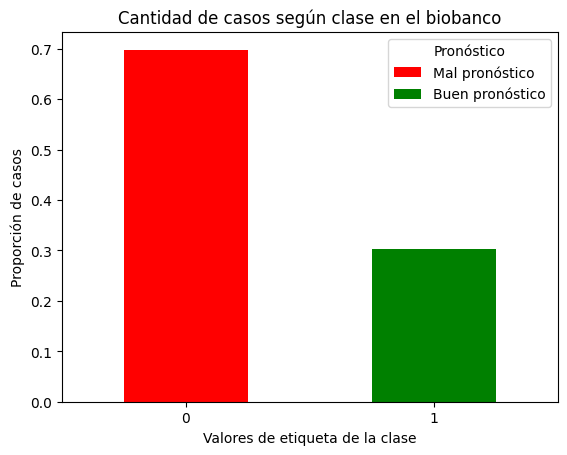

In [ ]:
grafico = biobanco['target'].value_counts(normalize= True).plot(kind='bar', color= ["red", "green"],legend=False)
plt.xlabel('Valores de etiqueta de la clase')
plt.ylabel('Proporción de casos')
plt.title('Cantidad de casos según clase en el biobanco')
plt.xticks(rotation=0)
barras = grafico.patches
labels = ['Mal pronóstico', 'Buen pronóstico']
# Tenemos que asignar manualmente las etiquetas porque por como funciona el método cuando hace el gráfico tiene un
# manejo poco claro de las clases y considera todo como una
for bar, label in zip(barras, labels):
    bar.set_label(label)
plt.legend(labels, title = 'Pronóstico')
plt.show()

In [ ]:
def separar_datos(dataset, prop_eval): #Separamos los datos de forma estratificada
  np.random.seed(2025)
  dataset = dataset.copy()
  cant_true = int(np.round(dataset['target'].value_counts()[1]*prop_eval))
  cant_false = int(np.round(dataset['target'].value_counts()[0]*prop_eval))
  true_encontrados = 0
  false_encontrado = 0
  datos_eval = pd.DataFrame(columns=dataset.columns)
  while(true_encontrados<cant_true or false_encontrado<cant_false):
    instancia = dataset.sample(1)
    if(true_encontrados<cant_true and instancia.iloc[0,200] == True):
      datos_eval = pd.concat([datos_eval, instancia], ignore_index=True)
      true_encontrados += 1
      dataset.drop(instancia.index,inplace = True)
      dataset.reset_index(inplace=True, drop=True)
    elif(false_encontrado<cant_false and instancia.iloc[0,200] == False):
      datos_eval = pd.concat([datos_eval, instancia], ignore_index=True)
      false_encontrado += 1
      dataset.drop(instancia.index,inplace = True)
      dataset.reset_index(inplace=True, drop = True)
  y_train = dataset.pop('target')
  y_eval = datos_eval.pop('target')
  return dataset, y_train, datos_eval, y_eval

In [ ]:
datos_train, y_train, datos_eval, y_eval = separar_datos(biobanco, 0.2) # Entrenamos con el 80% de los datos

<ipython-input-7-7255c08c353b>:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  datos_eval = pd.concat([datos_eval, instancia], ignore_index=True)


In [ ]:
y_eval.value_counts() #Checkeamos que se mantenga la proporción

,count
target,
0,70
1,30


## Ejercicio 2


### Construcción de modelos

Para este punto, la tarea consiste en construir y evaluar modelos de tipo **árbol de decisión**. Además, obtener una **estimación realista de la performance** de los mismos.

1. Entrenar un árbol de decisión con altura máxima 3 y el resto de los hiperparámetros en default.

1. Estimar la performance del modelo utilizando _K-fold cross validation_ con `K=5`, con las métricas _Accuracy_, _Area Under the Precision-Recall Curve (AUPRC)_, y _Area Under the Receiver Operating Characteristic Curve (AUCROC)_.

   En esta oportunidad se va a pedir además de calcular las métricas para cada fold por separado y su promedio, que hagan el cálculo del score global (como vimos en clase), sólo para los folds de validación.
   
   Reportar el resultado en una tabla similar a:

      <table>
      <thead>
      <tr>
      <th align="center">Permutación</th>
      <th>Accuracy (training)</th>
      <th>Accuracy (validación)</th>
      <th>AUPRC (training)</th>
      <th>AUPRC (validación)</th>
      <th>AUC ROC (training)</th>
      <th>AUC ROC (validación)</th>
      </tr>
      </thead>
      <tbody>
      <tr>
      <td align="center">1</td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      </tr>
      <tr>
      <td align="center">2</td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      </tr>
      <tr>
      <td align="center">3</td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      </tr>
      <tr>
      <td align="center">4</td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      </tr>
      <tr>
      <td align="center">5</td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      </tr>
      <tr>
      <td align="center">Promedios</td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      </tr>
      <td align="center">Global</td>
      <td>(NO) </td>
      <td></td>
      <td>(NO) </td>
      <td></td>
      <td>(NO) </td>
      <td></td>
      </tr>
      </tbody>
      </table>    
  
   **Importante**: de acá en más sólamente utilizaremos el score promedio cuando hagamos _K-fold cross-validation_.

1. Explorar las siguientes combinaciones de parámetros para  árboles de decisión (siguiendo con $k-fold$ con $k=5$) utilizando [ParameterGrid](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterGrid.html) de _scikit learn_. No está permitido utilizar `GridSearchCV` en este ejercicio.

   <table>
   <thead>
   <tr>
   <th align="center">Altura máxima</th>
   <th align="center">Criterio de corte</th>
   <th>Accuracy (training)</th>
   <th>Accuracy (validación)</th>
   </tr>
   </thead>
   <tbody><tr>
   <td align="center">3</td>
   <td align="center">Gini</td>
   <td></td>
   <td></td>
   </tr>
   <tr>
   <td align="center">5</td>
   <td align="center">Gini</td>
   <td></td>
   <td></td>
   </tr>
   <tr>
   <td align="center">Infinito</td>
   <td align="center">Gini</td>
   <td></td>
   <td></td>
   </tr>
   <tr>
   <td align="center">3</td>
   <td align="center">Entropía</td>
   <td></td>
   <td></td>
   </tr>
   <tr>
   <td align="center">5</td>
   <td align="center">Entropía</td>
   <td></td>
   <td></td>
   </tr>
   <tr>
   <td align="center">Infinito</td>
   <td align="center">Entropía</td>
   <td></td>
   <td></td>
   </tr>
   </tbody></table>

1. ¿Qué conclusiones se pueden sacar de estas tablas?  

### Item 1

In [ ]:
arbol = DecisionTreeClassifier(max_depth=3)
# Si bien declaramos el árbol como luego debemos estimar su performance usando kfold cross val, entrenaremos el árbol dentro de la función

### Item 2

In [ ]:
def stratify_k_fold_cross_validation(k, datos):
  np.random.seed(2025)
  folds = []

  X = datos.copy()

  # Implementaremos stratified k-Fold
  cant_true = int(X['target'].value_counts()[1]/k) # Calculo la cantidad de trues por fold, idem false
  cant_false = int(X['target'].value_counts()[0]/k)
  resto_true = (X['target'].value_counts()[1])%k # Calculo cuánto es el resto para ver qué pasa si la división no da resto 0, idem false
  resto_false = (X['target'].value_counts()[0])%k # La idea del resto es que cuando terminemos de dividir hagamos una división equitativa en cada uno


  for i in range(k):

    true_encontrados = 0
    false_encontrado = 0
    fold = pd.DataFrame(columns=datos.columns)

    while(true_encontrados<cant_true or false_encontrado<cant_false):

      instancia = X.sample(1)

      if(true_encontrados<cant_true and instancia.iloc[0,200] == True):

        fold = pd.concat([fold, instancia], ignore_index=True)
        true_encontrados += 1
        X.drop(instancia.index,inplace = True)
        X.reset_index(inplace=True, drop=True)

      elif(false_encontrado<cant_false and instancia.iloc[0,200] == False):

        fold = pd.concat([fold, instancia], ignore_index=True)
        false_encontrado += 1
        X.drop(instancia.index,inplace = True)
        X.reset_index(inplace=True, drop = True)

    folds.append(fold) # Almaceno el fold en mi array de folds


  # Si sobraron datos los voy repartiendo equitativamente por fold
  while(resto_true !=0 or resto_false != 0):

    instancia = X.sample(1)

    if instancia.iloc[0,200] == True:

      folds[resto_true-1] = pd.concat([folds[resto_true-1],instancia], ignore_index=True)
      resto_true -= 1

    else:

      folds[resto_false-1] = pd.concat([folds[resto_false-1],instancia], ignore_index=True)
      resto_false -= 1

    X.drop(instancia.index,inplace = True)
    X.reset_index(inplace=True, drop=True)

  return folds


In [ ]:
def k_fold_cross_validation(k, datos, y_train, max_depth=3, criterio_corte='gini'): #Gini pues es el criterio por default de los árboles
  datos = datos.copy()
  np.random.seed(2025)
  datos['target'] = y_train

  reales = np.array([]) # Etiquetas de y reales
  predicciones_globales_accuracy = np.array([]) # Vamos a almacenar las predicciones sobre validación
  predicciones_globales_AUPRC = np.array([])
  predicciones_globales_AUC_ROC = np.array([])

  accuracy_por_fold_val = []
  accuracy_por_fold_train = []
  AUPRC_por_fold_val = []
  AUPRC_por_fold_train = []
  AUC_ROC_por_fold_train = []
  AUC_ROC_por_fold_val = []

  filas = ["1", "2", "3", "4", "5", "Promedios", "Global"]
  columnas = ['Accuracy (training)', 'Accuracy (validación)',
    'AUPRC (training)', 'AUPRC (validación)',
    'AUC ROC (training)', 'AUC ROC (validación)']
  tabla = pd.DataFrame(index = filas, columns= columnas, dtype=float)

  y_train = y_train.copy()

  folds = stratify_k_fold_cross_validation(k, datos)


  # Arme los folds, entreno los árboles
  for i in range(k):
    arbol_i = DecisionTreeClassifier(max_depth=max_depth, criterion=criterio_corte)

    # Junto todos los folds de entrenamiento
    X_train = pd.concat([folds[(j+1+i)%k] for j in range(k-1)], ignore_index=True)

    y_train = X_train.pop('target').astype(int)

    X_val = folds[i].copy()
    y_val = X_val.pop('target').astype(int)

    # Entreno
    arbol_i.fit(X_train, y_train)

    # Calculo las predicciones sobre train
    predicciones_train = arbol_i.predict(X_train)
    predicciones_proba_train = arbol_i.predict_proba(X_train)[:,1]

    # Calculo las predicciones sobre validación
    predicciones_val = arbol_i.predict(X_val)
    predicciones_proba_val = arbol_i.predict_proba(X_val)[:,1]

    predicciones_globales_accuracy = np.concatenate([predicciones_globales_accuracy, predicciones_val])
    predicciones_globales_AUPRC = np.concatenate([predicciones_globales_AUPRC, predicciones_proba_val])
    predicciones_globales_AUC_ROC = np.concatenate([predicciones_globales_AUC_ROC, predicciones_proba_val])

    reales = np.concatenate([reales, y_val])
    accuracy_por_fold_val.append(arbol_i.score(X_val, y_val))
    accuracy_por_fold_train.append(arbol_i.score(X_train, y_train))
    AUPRC_por_fold_train.append(average_precision_score(y_train, predicciones_proba_train))
    AUPRC_por_fold_val.append(average_precision_score(y_val, predicciones_proba_val))
    AUC_ROC_por_fold_train.append(roc_auc_score(y_train, predicciones_proba_train))
    AUC_ROC_por_fold_val.append(roc_auc_score(y_val, predicciones_proba_val))

    tabla.iloc[i,0] = arbol_i.score(X_train, y_train)
    tabla.iloc[i,1] = arbol_i.score(X_val, y_val)
    tabla.iloc[i, 2] = average_precision_score(y_train, predicciones_proba_train)
    tabla.iloc[i, 3] = average_precision_score(y_val, predicciones_proba_val)
    tabla.iloc[i, 4] =  roc_auc_score(y_train, predicciones_proba_train)
    tabla.iloc[i, 5] = roc_auc_score(y_val, predicciones_proba_val)

  tabla.at['Promedios','Accuracy (training)'] = np.mean(accuracy_por_fold_train)
  tabla.at['Promedios','Accuracy (validación)'] = np.mean(accuracy_por_fold_val)
  tabla.at['Promedios', 'AUPRC (training)'] = np.mean(AUPRC_por_fold_train)
  tabla.at['Promedios', 'AUPRC (validación)'] = np.mean(AUPRC_por_fold_val)
  tabla.at['Promedios', 'AUC ROC (training)'] = np.mean(AUC_ROC_por_fold_train)
  tabla.at['Promedios', 'AUC ROC (validación)'] = np.mean(AUC_ROC_por_fold_val)

  tabla.at['Global', 'Accuracy (validación)'] = (predicciones_globales_accuracy == reales).mean()
  tabla.at['Global', 'Accuracy (training)'] = "(NO)"

  tabla.at['Global', 'AUPRC (validación)'] = average_precision_score(reales, predicciones_globales_AUPRC)
  tabla.at['Global', 'AUPRC (training)'] = "(NO)"

  tabla.at['Global', 'AUC ROC (validación)'] = roc_auc_score(reales, predicciones_globales_AUC_ROC)
  tabla.at['Global', 'AUC ROC (training)'] = "(NO)"

  return tabla

In [ ]:
k_fold_cross_validation(5, datos_train, y_train, 3)

<ipython-input-11-4714b1276861>:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fold = pd.concat([fold, instancia], ignore_index=True)
<ipython-input-11-4714b1276861>:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fold = pd.concat([fold, instancia], ignore_index=True)
<ipython-input-11-4714b1276861>:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining t

,Accuracy (training),Accuracy (validación),AUPRC (training),AUPRC (validación),AUC ROC (training),AUC ROC (validación)
1,0.815047,0.666667,0.711826,0.394031,0.829339,0.596429
2,0.828125,0.675000,0.717072,0.389167,0.813462,0.638393
3,0.809375,0.675000,0.706184,0.378841,0.831792,0.636905
4,0.79375,0.687500,0.63378,0.443271,0.844783,0.714658
5,0.82866,0.734177,0.70217,0.469676,0.799613,0.643939
Promedios,0.814991,0.687669,0.694206,0.414997,0.823798,0.646065
Global,(NO),0.687500,(NO),0.416946,(NO),0.655055


### Item 3

In [ ]:
par_grid = {'altura máxima': [3, 5, None], 'criterio de corte': ["gini", "entropy"]}
pg = ParameterGrid(param_grid=par_grid)


def grid_search(pg, datos_train, y_train):
  columnas = ['Altura máxima', 'Criterio de corte', 'Accuracy (training)', 'Accuracy (validación)']
  tabla = pd.DataFrame(columns= columnas, dtype=float)
  for hypers in list(pg):
    tabla_i = k_fold_cross_validation(5, datos_train, y_train, hypers['altura máxima'], hypers['criterio de corte'])
    accuracy_training = tabla_i.loc['Promedios']['Accuracy (training)']
    accuracy_validation = tabla_i.loc['Promedios']['Accuracy (validación)']
    tabla.loc[len(tabla)] = [hypers['altura máxima'], hypers['criterio de corte'], accuracy_training, accuracy_validation]
  return(tabla)

grid_search(pg, datos_train, y_train)

<ipython-input-11-4714b1276861>:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fold = pd.concat([fold, instancia], ignore_index=True)
<ipython-input-11-4714b1276861>:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fold = pd.concat([fold, instancia], ignore_index=True)
<ipython-input-11-4714b1276861>:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining t

,Altura máxima,Criterio de corte,Accuracy (training),Accuracy (validación)
0,3,gini,0.814991,0.687669
1,3,entropy,0.790630,0.667390
2,5,gini,0.931881,0.675258
3,5,entropy,0.904392,0.669824
4,None,gini,1.000000,0.647725
5,None,entropy,1.000000,0.667448


## Ejercicio 3

### Comparación de algoritmos

Se pide explorar distintas combinaciones de algoritmos de aprendizaje con diferentes configuraciones con el objetivo de **encontrar el mejor modelo** de cada familia de buscar la performance óptima. Para este ejercicio realizar una experimentación utilizando [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html). Como métrica de performance usar AUCROC resultante de 5-fold cross-validation.

Hiperparámetros_: Revisar la documentación de cada uno de los hiperparámetros para entender qué posibles hiperparámetros impacten de manera positiva en la construcción del algoritmo.

Documentación extra sobre [`Tuning hyper-parameters`](https://scikit-learn.org/stable/modules/grid_search.html), leer hasta 3.2.2.

1. Algoritmos a probar:
  - Árboles de decisión. Mínimo 4 hiperparámetros.
  - KNN (k-vecinos más cercanos). Mínimo 3 hiperparámetros.
  - SVM (Support vector machine). Mínimo 2 hiperparámetros.

Detallar los hiperparámetros elegidos para cada algoritmo y explicar la razón del espacio de búsqueda considerado para cada uno de estos, ¿cuántas iteraciones usaron?. A su vez, reportar la performance asociada de aquellos que consideren relevantes (al menos la mejor combinación para cada algoritmo).

2. Compare los resultados obtenidos en el ejercicio anterior con los siguientes modelos con sus hiperparámetros default.

  - LDA (Linear discriminant analysis)
  - Naïve Bayes

¿Qué resultados obtuvo? ¿Qué hiperparámetros podrían ser relevantes explorar en estos modelos? ¿Por qué?

3. ¿Cuál fue el mejor modelo y con qué configuración? Explicar por qué creería que dio mejor (recordando qué hace cada algoritmo y con qué tipo de datos están trabajando).

### Item 1

In [ ]:
par_arboles = {'criterion' : ['gini', 'entropy'],
               'max_depth' : list(range(1,10)),
               'min_samples_leaf' : list(range(1,8)),
               'max_features' : ['sqrt', 'log2', 200]}

In [ ]:
par_knn = {'n_neighbors' : list(range(1,11)),
           'weights' : ['uniform', 'distance'],
           'algorithm' : ['ball_tree', 'kd_tree', 'brute']}

In [ ]:
#No usamos Kernel precomputed porque la matriz de datos necesita ser cuadrada
par_svc = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
           'C' : list(np.linspace(1/320, 100, num = 10000)),
           'gamma' : ['scale', 'auto']
           }

In [ ]:
random_search_arbol = RandomizedSearchCV(DecisionTreeClassifier(), par_arboles, cv = 5, scoring = 'roc_auc', n_iter=100,random_state=2025)
mejor_arbol = random_search_arbol.fit(datos_train, y_train)

In [ ]:
random_search_arbol.best_params_

{'min_samples_leaf': 7,
 'max_features': 200,
 'max_depth': 3,
 'criterion': 'entropy'}

In [ ]:
print('Mejor score obtenido usando random search sobre árboles de decisión:', round(random_search_arbol.best_score_,4))

Mejor score obtenido usando random search sobre árboles de decisión: 0.6819


In [ ]:
random_search_knn = RandomizedSearchCV(KNeighborsClassifier(), par_knn, cv = 5, scoring = 'roc_auc', n_iter=60,random_state=2025)
#usamos 60 iteraciones porque explora todo el espacio
mejor_knn = random_search_knn.fit(datos_train, y_train)

In [ ]:
random_search_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5, 'algorithm': 'ball_tree'}

In [ ]:
print('Mejor score obtenido usando random search sobre KNN:', round(random_search_knn.best_score_,4))

Mejor score obtenido usando random search sobre KNN: 0.8451


In [ ]:
random_search_svc = RandomizedSearchCV(SVC(), par_svc, cv = 5, scoring = 'roc_auc', n_iter=100,random_state=2025)
mejor_svc = random_search_svc.fit(datos_train, y_train)

In [ ]:
random_search_svc.best_params_

{'kernel': 'rbf', 'gamma': 'scale', 'C': np.float64(20.424529015401543)}

In [ ]:
print('Mejor score obtenido usando random search sobre SVC:', round(random_search_svc.best_score_,4))

Mejor score obtenido usando random search sobre SVC: 0.9268


### Item 2

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(datos_train, y_train)

scores_lda = cross_val_score(lda, datos_train, y_train, cv=5, scoring='roc_auc')

print('Score obtenido usando LDA con hiperparámetros default:', round(scores_lda.mean(),4))

Score obtenido usando LDA con hiperparámetros default: 0.7409


In [ ]:
nb = GaussianNB()
nb.fit(datos_train, y_train)
scores_nb = cross_val_score(nb, datos_train, y_train, cv=5, scoring='roc_auc')
print('Score obtenido usando Naive Bayes con hiperparámetros default:', round(scores_nb.mean(),4))

Score obtenido usando Naive Bayes con hiperparámetros default: 0.7999


## Ejercicio 4
### Diagnóstico Sesgo-Varianza.

<span style="color: red;">(no realizar hasta la clase _Sesgo y Varianza_)</span>

En este punto, se pide inspeccionar **tres** de sus mejores modelos encontrados hasta ahora de cada familia de modelos: la mejor configuración para el árbol de decisión y la mejor configuración para SVM. Para ello:

1. Graficar curvas de complejidad para cada modelo, variando la profundidad en el caso de árboles, y el hiperparámetro C en el caso de SVM. Diagnosticar cómo afectan al sesgo y a la varianza esos dos hiperparámetros.
2. Graficar curvas de aprendizaje para cada modelo pero ahora incluya LDA. En base a estas curvas, sacar conclusiones sobre si los algoritmos parecen haber alcanzado su límite, o bien si aumentar la cantidad de datos debería ayudar.
3. Construir un modelo **RandomForest** con 200 árboles. Explorar para qué sirve el hiperparámetro max_features y cómo afecta a la performance del algoritmo mediante una curva de complejidad. Explicar por qué creen que se dieron los resultados obtenidos. Por último, graficar una curva de aprendizaje sobre los parámetros elegidos para determinar si sería útil o no conseguir más datos.


**Atención**: Tener en cuenta que debemos seguir utilizando AUC ROC como métrica para estas curvas.


### Item 1

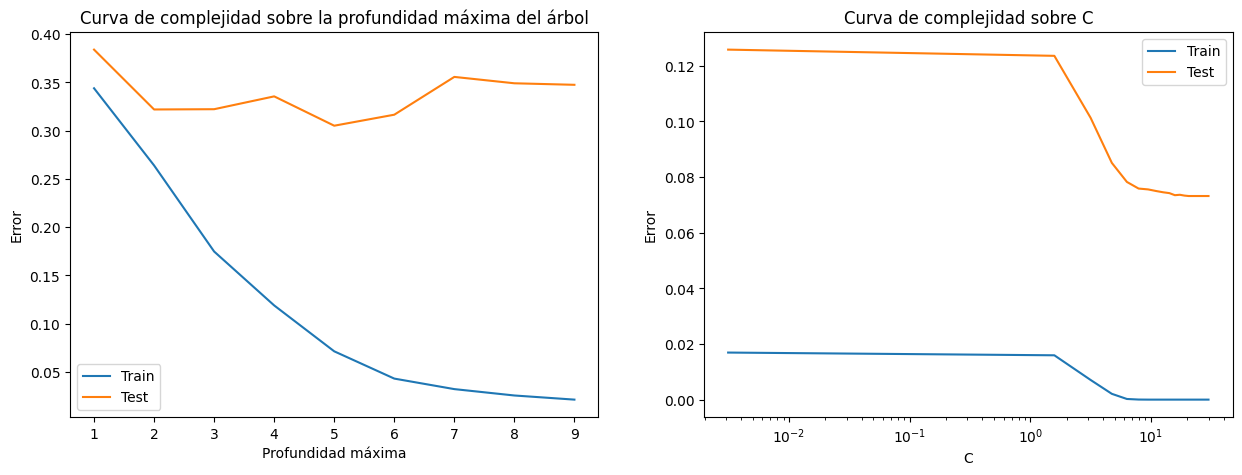

In [ ]:
np.random.seed(2025)


scores_train_a, scores_test_a = validation_curve(DecisionTreeClassifier(min_samples_leaf = 7,
                                                                        max_features = 200,
                                                                        criterion = 'entropy'),
                                                 datos_train,
                                                 y_train,
                                                 param_name = 'max_depth',
                                                 param_range = list(range(1,10)),
                                                 cv = 5,
                                                 scoring = 'roc_auc')

scores_train_s, scores_test_s = validation_curve(SVC(kernel='rbf', gamma='scale'),
                                                 datos_train,
                                                 y_train,
                                                 param_name = 'C',
                                                 param_range = np.linspace(1/320,10,20),
                                                 cv = 5,
                                                 scoring = 'roc_auc')

error_train_a = 1-scores_train_a
error_test_a = 1-scores_test_a
promedio_train_a = np.mean(error_train_a, axis = 1)
promedio_test_a = np.mean(error_test_a, axis = 1)
error_train_s = 1-scores_train_s
error_test_s = 1-scores_test_s
promedio_train_s = np.mean(error_train_s, axis = 1)
promedio_test_s = np.mean(error_test_s, axis = 1)


fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(list(range(1,10)), promedio_train_a, label = 'Train')
axes[0].plot(list(range(1,10)), promedio_test_a, label = 'Test')
axes[0].legend()
axes[0].set_xlabel("Profundidad máxima")
axes[0].set_ylabel("Error")
axes[0].set_title("Curva de complejidad sobre la profundidad máxima del árbol")

axes[1].plot(np.linspace(1/320,30,20), promedio_train_s, label = 'Train')
axes[1].plot(np.linspace(1/320,30,20), promedio_test_s, label = 'Test')
axes[1].set_xscale('log')
axes[1].legend()
axes[1].set_xlabel("C")
axes[1].set_ylabel("Error")
axes[1].set_title("Curva de complejidad sobre C")


plt.show()


### Item 2

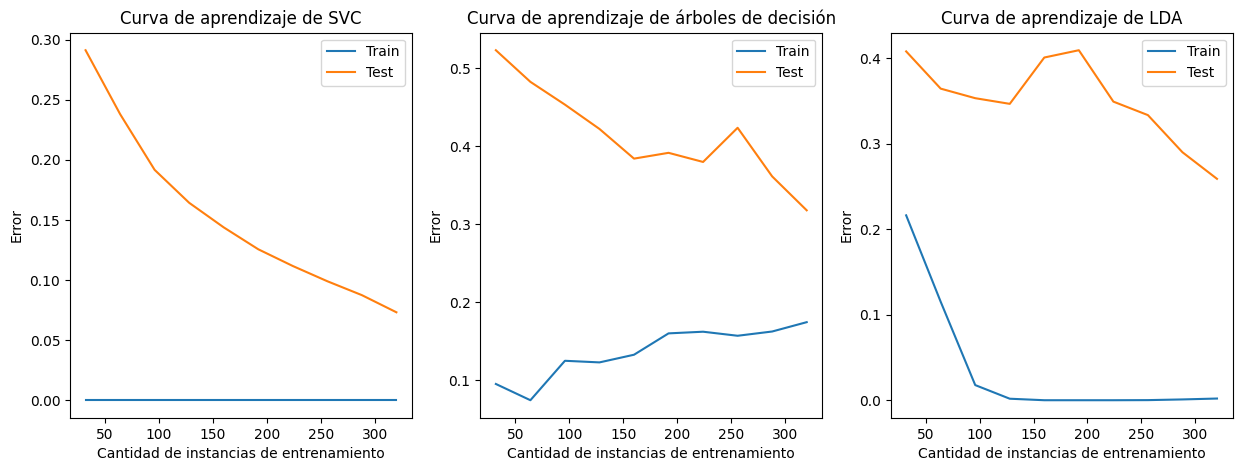

In [ ]:
# Seleccionamos los mejores parámetros de cada modelo
best_SVC_params = {'kernel': 'rbf', 'gamma': 'scale', 'C': np.float64(20.424529015401543)}
best_dT_params = {'min_samples_leaf': 7, 'max_features': 200, 'max_depth': 3, 'criterion': 'entropy'}
# Para LDA dejamos el default

svc_learning_c = SVC(**best_SVC_params) # Desglosamos los diccionarios dentro
dT_learning_c = DecisionTreeClassifier(**best_dT_params)
lda_learning_c = LinearDiscriminantAnalysis()


train_sizes = np.arange(0.1, 1.01, 0.1) #Como el arange no incluye el stop hacemos que vaya hasta 0.1

#Hacemos los cálculos

train_sizes_s, scores_train_learn_s, scores_test_learn_s = learning_curve(svc_learning_c,
                                                                          datos_train,
                                                                          y_train,
                                                                          train_sizes = train_sizes,
                                                                          cv = 5,
                                                                          scoring = 'roc_auc')

train_sizes_a, scores_train_learn_a, scores_test_learn_a = learning_curve(dT_learning_c,
                                                                          datos_train,
                                                                          y_train,
                                                                          train_sizes = train_sizes,
                                                                          cv = 5,
                                                                          scoring = 'roc_auc')

train_sizes_l, scores_train_learn_l, scores_test_learn_l = learning_curve(lda_learning_c,
                                                                          datos_train,
                                                                          y_train,
                                                                          train_sizes = train_sizes,
                                                                          cv = 5,
                                                                          scoring = 'roc_auc')
# Graficamos

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

error_train_learn_s = 1-scores_train_learn_s
error_test_learn_s = 1-scores_test_learn_s
promedio_train_learn_s = np.mean(error_train_learn_s, axis = 1)
promedio_test_learn_s = np.mean(error_test_learn_s, axis = 1)
axes[0].plot(train_sizes_s, promedio_train_learn_s, label = 'Train')
axes[0].plot(train_sizes_s, promedio_test_learn_s, label = 'Test')
axes[0].legend()
axes[0].set_xlabel("Cantidad de instancias de entrenamiento")
axes[0].set_ylabel("Error")
axes[0].set_title("Curva de aprendizaje de SVC")



error_train_learn_a = 1-scores_train_learn_a
error_test_learn_a = 1-scores_test_learn_a
promedio_train_learn_a = np.mean(error_train_learn_a, axis = 1)
promedio_test_learn_a = np.mean(error_test_learn_a, axis = 1)
axes[1].plot(train_sizes_a, promedio_train_learn_a, label = 'Train')
axes[1].plot(train_sizes_a, promedio_test_learn_a, label = 'Test')
axes[1].legend()
axes[1].set_xlabel("Cantidad de instancias de entrenamiento")
axes[1].set_ylabel("Error")
axes[1].set_title("Curva de aprendizaje de árboles de decisión")


error_train_learn_l = 1-scores_train_learn_l
error_test_learn_l = 1-scores_test_learn_l
promedio_train_learn_l = np.mean(error_train_learn_l, axis = 1)
promedio_test_learn_l = np.mean(error_test_learn_l, axis = 1)
axes[2].plot(train_sizes_l, promedio_train_learn_l, label = 'Train')
axes[2].plot(train_sizes_l, promedio_test_learn_l, label = 'Test')
axes[2].legend()
axes[2].set_xlabel("Cantidad de instancias de entrenamiento")
axes[2].set_ylabel("Error")
axes[2].set_title("Curva de aprendizaje de LDA")

plt.show()

### Item 3

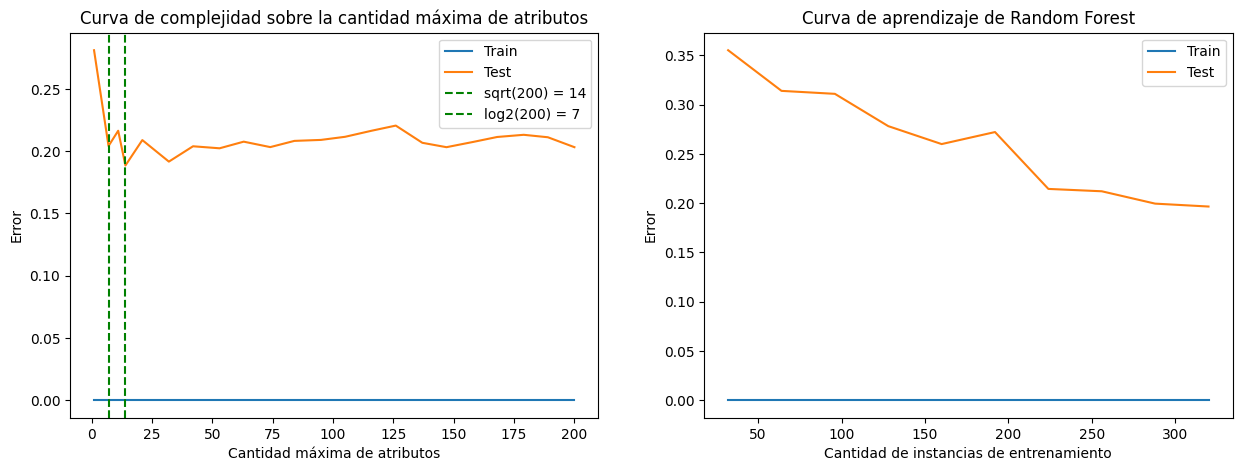

In [ ]:
np.random.seed(2025)

RF = RandomForestClassifier(n_estimators = 200)
features_valores_numericos = np.linspace(1,200,20, dtype = int)
features_valores_numericos = np.append(features_valores_numericos, int(np.sqrt(200)))
features_valores_numericos = np.append(features_valores_numericos, int(np.log2(200)))

scores_train_RF, scores_test_RF = validation_curve(RF,
                                             datos_train,
                                             y_train,
                                             param_name = 'max_features',
                                             param_range = list(features_valores_numericos),
                                             cv = 5,
                                             scoring = 'roc_auc')

train_sizes_RF, scores_train_learn_RF, scores_test_learn_RF = learning_curve(RF,
                                                                             datos_train,
                                                                             y_train,
                                                                             train_sizes = train_sizes,
                                                                             cv = 5,
                                                                             scoring = 'roc_auc')




error_train_RF = 1-scores_train_RF
error_test_RF = 1-scores_test_RF
promedio_train_RF = np.mean(error_train_RF, axis = 1)
promedio_test_RF = np.mean(error_test_RF, axis = 1)

# 1. Obtener los índices que ordenarían features_valores_numericos
indices_ordenados = np.argsort(features_valores_numericos)

# 2. Aplicar el ordenamiento a todos los arrays
features_valores_ordenados = features_valores_numericos[indices_ordenados]
promedio_train_RF_ordenado = promedio_train_RF[indices_ordenados]
promedio_test_RF_ordenado = promedio_test_RF[indices_ordenados]

# Curva de aprendizaje
error_train_learn_RF = 1-scores_train_learn_RF
error_test_learn_RF = 1-scores_test_learn_RF
promedio_train_learn_RF = np.mean(error_train_learn_RF, axis = 1)
promedio_test_learn_RF = np.mean(error_test_learn_RF, axis = 1)


fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(features_valores_ordenados, promedio_train_RF_ordenado, label = 'Train')
axes[0].plot(features_valores_ordenados, promedio_test_RF_ordenado, label = 'Test')
axes[0].set_title("Curva de complejidad sobre la cantidad máxima de atributos")
axes[0].set_xlabel("Cantidad máxima de atributos")
axes[0].set_ylabel("Error")
axes[0].axvline(x=int(np.sqrt(200)), color='g', linestyle='--', label= f'sqrt(200) = {int(np.sqrt(200))}')
axes[0].axvline(x=int(np.log2(200)), color='g', linestyle='--', label=f'log2(200) = {int(np.log2(200))}')
axes[0].legend()

axes[1].plot(train_sizes_RF, promedio_train_learn_RF, label = 'Train')
axes[1].plot(train_sizes_RF, promedio_test_learn_RF, label = 'Test')
axes[1].legend()
axes[1].set_xlabel("Cantidad de instancias de entrenamiento")
axes[1].set_ylabel("Error")
axes[1].set_title("Curva de aprendizaje de Random Forest")

plt.show()

## Ejercicio 5:
### Evaluación de performance

- La entrega del trabajo estará acompañada de una evaluación en la cual deberán poner a prueba su mejor modelo y sobre todo, su capacidad para estimar sus resultados.

- Su tarea será estimar la performance (AUCROC) que tendrá su mejor modelo en datos de evaluación (X_held_out).

- Para ello, deberán predecir las **probabilidades** de las distintas instancias con su modelo, enviarnos dichas probabilidades junto a una estimación con 4 decimales de cuál será el AUCROC resultante y calcularemos el resultado real. Consideraremos que el **mejor modelo será el que se encuentre más cerca del valor real que calcularemos luego de la entrega**.

- Recomendamos no perder de vista esta evaluación/competencia durante el desarrollo del TP, sobretodo en el momento de separar los datos en los primeros puntos.

- Para que podamos evaluar la performance, junto con la entrega del informe, deberán enviar un archivo con el numero de grupo con dos digitos en formato csv con la columna `output` y el valor obtenido con 4 decimales (se subirá un ejemplo cuando se publiquen los datos de la competencia) y un valor esperado de AUCROC: `GG_y_pred_held_out_AUCROC`.

    - Ej.: el grupo tres cree que obtuvo un valor de 0.7321 de AUCROC deberá submitear un archivo llamado: `03_y_pred_held_out_7321.csv`.

- Los datos podrán encontrarlos en este [link](https://github.com/aprendizaje-automatico-dc-uba-ar/material/tree/main/tp/01_aprendizaje_supervisado/datos).

- Las decisiones de este punto pueden desarrollarse hasta en una carilla, aunque con media debería alcanzar.


In [ ]:
url_X_held_out = 'https://raw.githubusercontent.com/aprendizaje-automatico-dc-uba-ar/material/main/tp/01_aprendizaje_supervisado/datos/X_held_out.csv'
X_held_out = pd.read_csv(url_X_held_out)

In [ ]:
X_held_out.head()

,QqgU,IJsJ,YlJA,tFLR,MYkJ,Cado,cmdU,AUYy,mVEY,zSZq,...,tcgd,cgNV,naPw,EOre,sMSU,TihR,sbWq,aWBQ,fGxK,JWOq
0,5.508080,0.420054,-0.789707,0.941013,0.558492,-1.002138,1.998913,-0.723894,0.763113,0.863244,...,0.007494,0.760240,-0.466683,2.595840,2.752572,11.243271,-2.656291,0.909001,-0.806831,0.341176
1,3.695592,1.160276,-1.043238,0.510328,0.711253,-0.652713,-1.262622,2.190490,7.297538,0.371713,...,0.767884,1.454539,0.566224,-1.775845,0.177761,4.853189,-1.336561,-0.360608,-0.581835,0.066407
2,3.883304,0.970138,-0.565715,-0.394693,0.090155,-0.898639,-1.740594,0.793736,-0.699059,1.609963,...,-0.033046,-0.766638,-1.855062,2.957222,1.530518,3.987399,-5.455953,0.289343,-0.152229,1.055291
3,1.888547,-1.143082,-0.194997,-0.519309,-0.767901,-0.148691,1.302902,-0.747841,-14.184816,-1.345553,...,1.000059,1.591268,-0.183507,-0.667092,-1.067191,-5.114419,4.657365,1.099383,1.013787,0.408798
4,-1.822079,0.059887,-0.119289,1.367910,0.521918,-1.166372,-1.371524,0.804922,-15.253464,-0.165375,...,1.042819,1.079255,1.297911,-0.189804,0.289411,-1.859782,1.316105,1.007962,1.410336,-1.419920


In [ ]:
np.random.seed(2025)
best_SVC_params = {'kernel': 'rbf', 'gamma': 'scale', 'C': np.float64(20.424529015401543)}
best_model = SVC(**best_SVC_params, probability = True)
best_model.fit(datos_train, y_train)

SVC(C=np.float64(20.424529015401543), probability=True)

In [ ]:
# Prediccion del mejor modelo con los datos de evaluación
predictions_eval = best_model.predict_proba(datos_eval)[:,1]
predictions_eval

y_eval = np.array(y_eval, dtype=int).ravel()

AUC_ROC_eval = roc_auc_score(y_eval, predictions_eval)
print('AUC ROC estimado:', round(AUC_ROC_eval,4))

AUC ROC estimado: 0.8748


In [ ]:
X_held_out_predictions = best_model.predict_proba(X_held_out)[:,1].round(4)

X_held_out_predictions_DataFrame = pd.DataFrame(X_held_out_predictions, columns=["output"])
X_held_out_predictions_DataFrame.to_csv("12_y_pred_held_out_8748.csv", index = False)

## Ejercicio 6:
### Conclusiones

Escribir como mínimo en un párrafo, una conclusión del trabajo realizado, incluyendo problemas encontrados y
aspectos no incluidos en el enunciado que hayan sido abordadas durante el desarrollo.

---
## Entregables
- Contarán con un esqueleto en formato Jupyter Notebook en donde podrán intercalar celdas para reportar y responder a los ítems de cada ejercicio.
- Los entregrables serán
    - Un informe en formato .pdf (**digital**) que responda a los ítems de este enunciado respetando la cantidad de espacio máximo por cada ítem. Nombrarlo siguiendo el formato `GG_Nombre_de_grupo`
    - Adjuntar el notebook final en formatos .pdf e .ipynb. Es necesario que los resultados puedan reproducirse al ejecutar todas las celdas en orden (verificarlo haceindo: Kernel -> Restart and Run All).
    - Las predicciones del *held out* del punto 5 en formato csv.
- Habŕa una entrega intermedia obligatoria que deberán hacer antes del 17 de abril de 2025 a las 17:00hs. Para esta entrega deberán enviar el código que resuelve los primeros 3 ejercicios.
- La **fecha** y **hora límite** de entrega está determinada en el campus de la materia.
- El trabajo deberá elaborarse en grupos de 5 personas.
- Se podrán pedir pruebas de integridad y autoría; es decir, verificar que la salida solicitada es fruto del modelo presentado y que el modelo fue construido según lo requerido en este enunciado.
- La evaluación será grupal y se basará en la calidad del informe (presentación, claridad, prolijidad); la originalidad, practicidad y coherencia técnica de la solución; la corrección y solidez de las pruebas realizadas.
